#### No inhibitor K<sub>m</sub> data ####

In [88]:
mm <- structure(list(S = c(9.998, 25, 50, 100, 1000, 1875),
                     v = c(0.041, 0.047, 0.060, 0.071, 0.139, 0.126)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mm)

         S     v
1    9.998 0.041
2   25.000 0.047
3   50.000 0.060
4  100.000 0.071
5 1000.000 0.139
6 1875.000 0.126


#### Br<sup>-</sup> Inhibitor  ####

In [89]:
mmBr <- structure(list(S = c(7.531538317, 18.83239171, 37.66478343, 188.3239171, 753.2956685, 1412.429379),
                     v = c(0.022916667, 0.020833333, 0.052314815, 0.085416667, 0.090046296, 0.098842593)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mmBr)

            S          v
1    7.531538 0.02291667
2   18.832392 0.02083333
3   37.664783 0.05231482
4  188.323917 0.08541667
5  753.295669 0.09004630
6 1412.429379 0.09884259


#### NO<sub>3</sub><sup>-</sup>  inhibitor ####

In [90]:
mmNO3 <- structure(list(S = c(8.017076373, 20.04670883, 40.09341766, 80.18683533, 200.4670883, 801.8683533),
                     v = c(0.009259259, 0.014583333, 0.018981481, 0.031944444, 0.030787037, 0.044212963)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mmNO3)

           S           v
1   8.017076 0.009259259
2  20.046709 0.014583333
3  40.093418 0.018981481
4  80.186835 0.031944444
5 200.467088 0.030787037
6 801.868353 0.044212963


Load the required libraries

In [91]:
library(drc) # for fitting Michaelis Menten model
library(ggplot2) # for drawing

We fit the data using function drm. We are saying that <code style="color:red">v</code> depends on <code style="color:red">S</code>, and the model that should be fitted is a two parameter Michaelis-Menten model (coded in functoin <span style="color:red">MM.2</span>). After the model has been fitted, we predict the values in order to get a smooth fitted line.



<code style= "color:red">mml</code> is loaded with non linear least squares fit for acid phosphatase with substrate PNPP with no inhibitor

In [92]:
model.drm <- drm (v ~ S, data = mm, fct = MM.2())

mml <- data.frame(S = seq(0, max(mm$S), length.out = 100))
mml$v <- predict(model.drm, newdata = mml)

<code style= "color:red">mmlBR</code> is loaded with non linear least squares fit for acid phosphatase with substrate PNPP with inhibitor Br-

In [93]:
model.drm <- drm (v ~ S, data = mmBr, fct = MM.2())

mmlBr <- data.frame(S = seq(0, max(mmBr$S), length.out = 100))
mmlBr$v <- predict(model.drm, newdata = mmlBr)

<code style= "color:red">mmlNO3</code> is loaded with non linear least squares fit for acid phosphatase with substrate PNPP with inhibitor NO<sub>3</sub><sup>-</sup>

In [94]:
model.drm <- drm (v ~ S, data = mmNO3, fct = MM.2())

mmlNO3 <- data.frame(S = seq(0, max(mmNO3$S), length.out = 100))
mmlNO3$v <- predict(model.drm, newdata = mmlNO3)

Making the combinded plot ... Acid phosphatese with  no inhibitoer and Br<sup>-</sup>

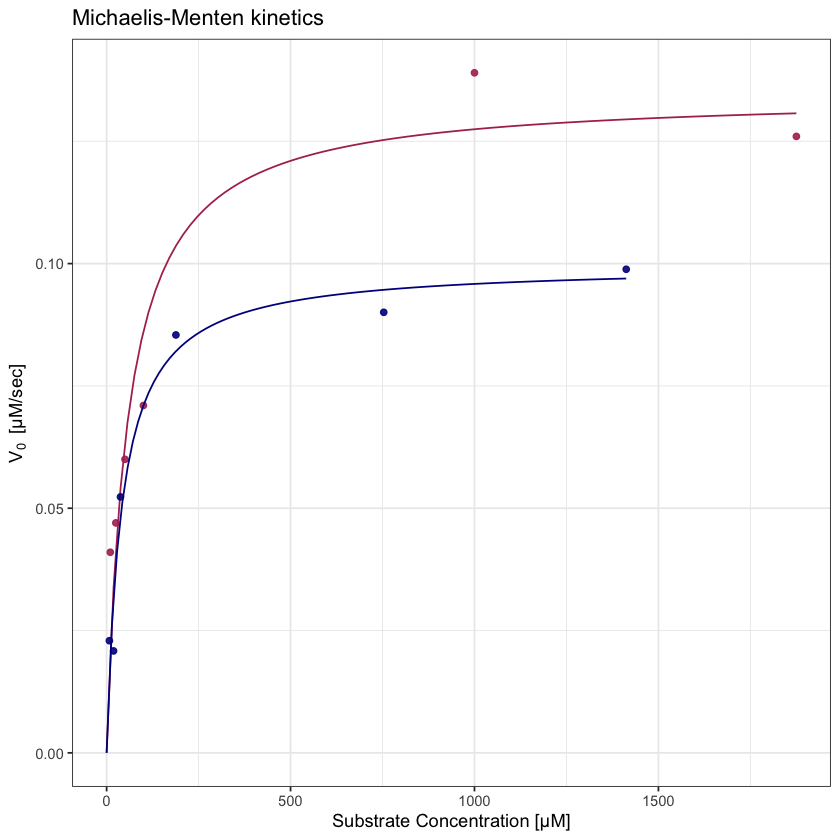

In [95]:
ggplot(mm, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [μM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(data = mm, alpha = 0.9, colour = "maroon") +
  geom_line(data = mml, aes(x = S, y = v), colour = "maroon") +
  geom_point(data = mmBr, alpha = 0.9, colour = "dark blue") +
  geom_line(data = mmlBr, aes(x = S, y = v), colour = "dark blue")
  

In [96]:
ggsave("mmBrComb.pdf", width = 6, height = 4, device = cairo_pdf) #write to pdf

Making the combinded plot ... Acid phosphatese with no inhibitoer and NO<sub>3</sub><sup>-</sup>

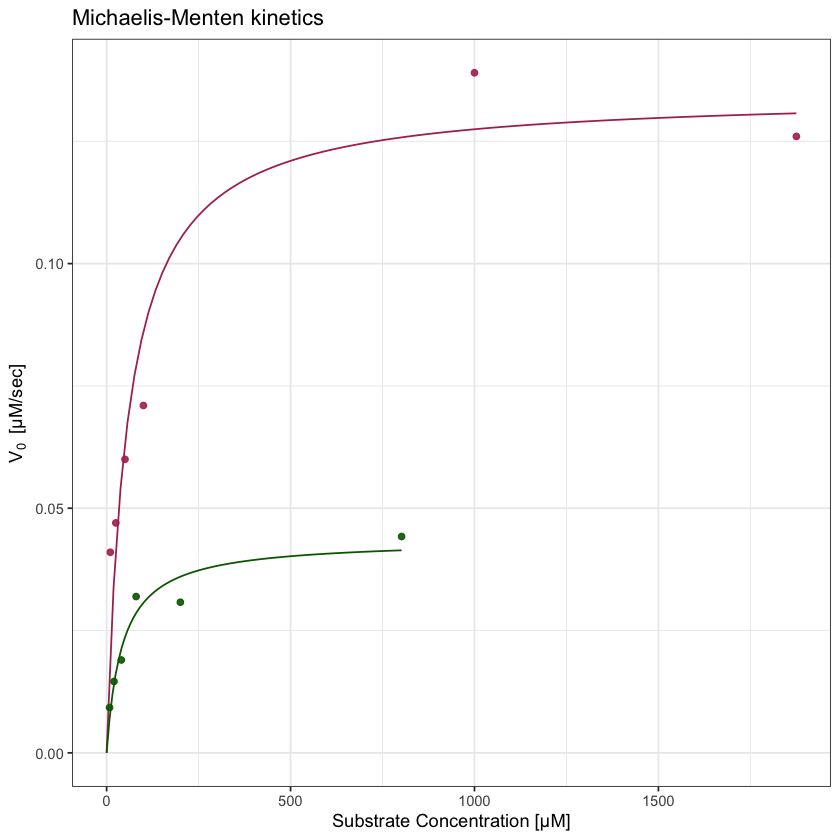

In [97]:
ggplot(mm, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [μM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(data = mm, alpha = 0.9, colour = "maroon") +
  geom_line(data = mml, aes(x = S, y = v), colour = "maroon") +
  geom_point(data = mmNO3, alpha = 0.9, colour = "dark green") +
  geom_line(data = mmlNO3, aes(x = S, y = v), colour = "dark green")

In [98]:
ggsave("mmNO3Comb.pdf", width = 6, height = 4, device = cairo_pdf) #write to pdf